<a href="https://colab.research.google.com/github/NNEKUS/-data-engineering-project-template./blob/main/My_Data_Cleaning_and_Enrichment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [369]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [370]:
def get_count():
    url = "https://www.worldometers.info/coronavirus/"

    r = requests.get(url)
    html = r.text

    soup = BeautifulSoup(html)
    table = soup.find('table', {"class": "table table-bordered table-hover main_table_countries"})
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])

    # result = pd.DataFrame(data, columns = ['CountryOther',    'TotalCases',    'NewCases',    'TotalDeaths',    'NewDeaths',    'TotalRecovered',    'ActiveCases',    'Serious/Critical',    'TotCases/1Mpop',    'Deaths/1Mpop'])

    # Step 3: Analyze the HTML tag, where your content lives

    # Find the country list table in the webpage, using find returns the first occurence 
    my_table = soup.find('table',{'id':'main_table_countries_today'})

    # Find all table rows in the first table (i.e. the table of interest)
    table_rows = my_table.find_all('tr')

    # Since the country names are the first button in each row, find all buttons from the 
    # 1st row and return their text. 
    # we use 'td' because td is the closing html tag
    countries = [row.find('td') for row in table_rows]

    # print(countries)

    pd.options.display.max_rows
    pd.options.display.max_rows = 999
    df = pd.DataFrame()
    df['Country'] = countries
    df

    cases=[]
    for row in table_rows:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        cases.append(cols)

    # Getting attribute name 
    # find the tables 
    attribute_tag = my_table.find_all('th')
    attribute=[]
    for i in attribute_tag:
        attribute.append(i.text)

    df=pd.DataFrame(cases,columns=attribute)

    df_new=df[1:-1]

    result = df_new.fillna("Nan")

    return result


In [371]:
df_test = get_count()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    246 non-null    object
 1   Country,Other        246 non-null    object
 2   TotalCases           246 non-null    object
 3   NewCases             246 non-null    object
 4   TotalDeaths          246 non-null    object
 5   NewDeaths            246 non-null    object
 6   TotalRecovered       246 non-null    object
 7   NewRecovered         246 non-null    object
 8   ActiveCases          246 non-null    object
 9   Serious,Critical     246 non-null    object
 10  Tot Cases/1M pop     246 non-null    object
 11  Deaths/1M pop        246 non-null    object
 12  TotalTests           246 non-null    object
 13  Tests/
1M pop
       246 non-null    object
 14  Population           246 non-null    object
 15  Continent            246 non-null    object
 16  1 Caseev

In [372]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"124,750,163",,"1,612,900",,"120,066,558","+2,971","3,070,705","7,890",,,,,,North America,,,,,,
2,,Asia,"214,560,003","+36,030","1,537,690",+86,"199,199,181","+32,962","13,823,132","15,525",,,,,,Asia,,,,,,
3,,Europe,"246,620,172","+18,538","2,019,632",+65,"242,195,475","+23,993","2,405,065","6,482",,,,,,Europe,,,,,,
4,,South America,"68,051,122",+201,"1,350,978",+20,"66,306,365","+2,104","393,779","10,183",,,,,,South America,,,,,,
5,,Oceania,"14,027,245",,"26,221",,"13,861,322",,"139,702",55,,,,,,Australia/Oceania,,,,,,
6,,Africa,"12,797,574",,"258,593",,"12,076,693",,"462,288",548,,,,,,Africa,,,,,,
7,,,721,,15,,706,,0,0,,,,,,,,,,,,
8,,World,"680,807,000","+54,769","6,806,029",+171,"653,706,300","+62,030","20,294,671","40,683","87,341",873.2,,,,All,,,,,,
9,1,USA,"105,409,318",,"1,146,835",,"102,898,370",,"1,364,113","2,724","314,838","3,425","1,167,729,364","3,487,787","334,805,269",North America,3,292,0,,,"4,074"
10,2,India,"44,688,367",,"530,775",,"44,154,622",,"2,970",N/A,"31,770",377,"919,232,902","653,499","1,406,631,776",Asia,31,"2,650",2,,,2


In [373]:
##we want to see all the columns without the eclipses

pd.set_option("display.max.columns", None)

In [374]:
df_test.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"124,750,163",,"1,612,900",,"120,066,558","+2,971","3,070,705","7,890",,,,,,North America,,,,,,
2,,Asia,"214,560,003","+36,030","1,537,690",+86,"199,199,181","+32,962","13,823,132","15,525",,,,,,Asia,,,,,,
3,,Europe,"246,620,172","+18,538","2,019,632",+65,"242,195,475","+23,993","2,405,065","6,482",,,,,,Europe,,,,,,
4,,South America,"68,051,122",+201,"1,350,978",+20,"66,306,365","+2,104","393,779","10,183",,,,,,South America,,,,,,
5,,Oceania,"14,027,245",,"26,221",,"13,861,322",,"139,702",55,,,,,,Australia/Oceania,,,,,,


In [375]:
##since empty cells are null values, we replace them with NaN

df_test = df_test.replace('', np.nan)
df_test = df_test.replace('N/A', np.nan)

In [376]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,NaN,North America,"124,750,163",NaN,"1,612,900",NaN,"120,066,558","+2,971","3,070,705","7,890",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Asia,"214,560,003","+36,030","1,537,690",+86,"199,199,181","+32,962","13,823,132","15,525",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"246,620,172","+18,538","2,019,632",+65,"242,195,475","+23,993","2,405,065","6,482",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,South America,"68,051,122",+201,"1,350,978",+20,"66,306,365","+2,104","393,779","10,183",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Oceania,"14,027,245",NaN,"26,221",NaN,"13,861,322",NaN,"139,702",55,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,797,574",NaN,"258,593",NaN,"12,076,693",NaN,"462,288",548,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"680,807,000","+54,769","6,806,029",+171,"653,706,300","+62,030","20,294,671","40,683","87,341",873.2,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
9,1,USA,"105,409,318",NaN,"1,146,835",NaN,"102,898,370",NaN,"1,364,113","2,724","314,838","3,425","1,167,729,364","3,487,787","334,805,269",North America,3,292,0,NaN,NaN,"4,074"
10,2,India,"44,688,367",NaN,"530,775",NaN,"44,154,622",NaN,"2,970",NaN,"31,770",377,"919,232,902","653,499","1,406,631,776",Asia,31,"2,650",2,NaN,NaN,2


In [377]:
df_test.isnull()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,True,False,False,True,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
5,True,False,False,True,False,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True
6,True,False,False,True,False,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True
7,True,True,False,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
8,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True
9,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
10,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False


In [378]:
##we install some dependencies to help us explore our dataset

!pip install requests pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:>

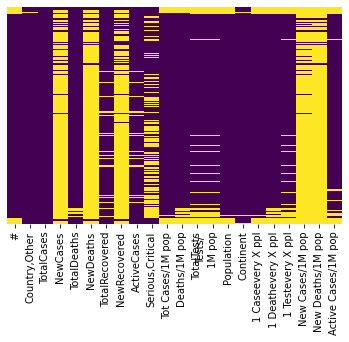

In [379]:
##visualize the extent of null values in the dataset

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [380]:
##I checked for the percentage of null values in the columns

df_test.isnull().mean() * 100

#                       6.097561
Country,Other           0.406504
TotalCases              0.000000
NewCases               89.837398
TotalDeaths             2.439024
NewDeaths              93.089431
TotalRecovered          8.536585
NewRecovered           85.772358
ActiveCases             7.723577
Serious,Critical       42.276423
Tot Cases/1M pop        6.504065
Deaths/1M pop           8.943089
TotalTests             13.414634
Tests/\n1M pop\n       13.414634
Population              6.910569
Continent               1.626016
1 Caseevery X ppl       6.910569
1 Deathevery X ppl      9.349593
1 Testevery X ppl      13.414634
New Cases/1M pop       92.682927
New Deaths/1M pop      95.934959
Active Cases/1M pop    10.162602
dtype: float64

### #NewCases has 82.926%, NewDeaths has 89.024%, NewRecovered has 80.489%, New Cases/1M pop has 87.398% and New Deaths/1M pop has 92.682% null values. These are way higher than the acceptable 50% threshold, hence, these columns have to be dropped.

In [381]:
##let's drop all the columns with more than 50% null values

df_test = df_test.drop(['NewCases', 'NewDeaths', 'NewRecovered', 'New Cases/1M pop', 'New Deaths/1M pop'], axis=1)
df_test.head(20)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,"124,750,163","1,612,900","120,066,558","3,070,705","7,890",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,"214,560,003","1,537,690","199,199,181","13,823,132","15,525",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,"246,620,172","2,019,632","242,195,475","2,405,065","6,482",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,"68,051,122","1,350,978","66,306,365","393,779","10,183",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,"14,027,245","26,221","13,861,322","139,702",55,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,797,574","258,593","12,076,693","462,288",548,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
7,NaN,NaN,721,15,706,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"680,807,000","6,806,029","653,706,300","20,294,671","40,683","87,341",873.2,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
9,1,USA,"105,409,318","1,146,835","102,898,370","1,364,113","2,724","314,838","3,425","1,167,729,364","3,487,787","334,805,269",North America,3,292,0,"4,074"
10,2,India,"44,688,367","530,775","44,154,622","2,970",NaN,"31,770",377,"919,232,902","653,499","1,406,631,776",Asia,31,"2,650",2,2


In [382]:
df_test['TotalCases'] = df_test['TotalCases'].astype(str).str.replace(',', '').astype(int)

In [383]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    231 non-null    object
 1   Country,Other        245 non-null    object
 2   TotalCases           246 non-null    int64 
 3   TotalDeaths          240 non-null    object
 4   TotalRecovered       225 non-null    object
 5   ActiveCases          227 non-null    object
 6   Serious,Critical     142 non-null    object
 7   Tot Cases/1M pop     230 non-null    object
 8   Deaths/1M pop        224 non-null    object
 9   TotalTests           213 non-null    object
 10  Tests/
1M pop
       213 non-null    object
 11  Population           229 non-null    object
 12  Continent            242 non-null    object
 13  1 Caseevery X ppl    229 non-null    object
 14  1 Deathevery X ppl   223 non-null    object
 15  1 Testevery X ppl    213 non-null    object
 16  Active C

In [384]:
df_test['Deaths/1M pop'] = pd.to_numeric(df_test['Deaths/1M pop'],errors='coerce')
df_test = df_test.replace(np.nan, 0, regex=True)
df_test['Deaths/1M pop'] = df_test['Deaths/1M pop'].astype(int)
df_test['Active Cases/1M pop'] = pd.to_numeric(df_test['Active Cases/1M pop'],errors='coerce')
df_test = df_test.replace(np.nan, 0, regex=True)
df_test['Active Cases/1M pop'] = df_test['Active Cases/1M pop'].astype(int)


In [385]:
df_test = df_test.replace('nan', '0')

In [386]:
df_test.head(20)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,0,North America,124750163,"1,612,900","120,066,558","3,070,705","7,890",0,0,0,0,0,North America,0,0,0,0
2,0,Asia,214560003,"1,537,690","199,199,181","13,823,132","15,525",0,0,0,0,0,Asia,0,0,0,0
3,0,Europe,246620172,"2,019,632","242,195,475","2,405,065","6,482",0,0,0,0,0,Europe,0,0,0,0
4,0,South America,68051122,"1,350,978","66,306,365","393,779","10,183",0,0,0,0,0,South America,0,0,0,0
5,0,Oceania,14027245,"26,221","13,861,322","139,702",55,0,0,0,0,0,Australia/Oceania,0,0,0,0
6,0,Africa,12797574,"258,593","12,076,693","462,288",548,0,0,0,0,0,Africa,0,0,0,0
7,0,0,721,15,706,0,0,0,0,0,0,0,0,0,0,0,0
8,0,World,680807000,"6,806,029","653,706,300","20,294,671","40,683","87,341",873,0,0,0,All,0,0,0,0
9,1,USA,105409318,"1,146,835","102,898,370","1,364,113","2,724","314,838",0,"1,167,729,364","3,487,787","334,805,269",North America,3,292,0,0
10,2,India,44688367,"530,775","44,154,622","2,970",0,"31,770",377,"919,232,902","653,499","1,406,631,776",Asia,31,"2,650",2,2


In [388]:
import numpy as np

In [389]:
cols_to_convert = ['TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop','TotalTests', 'Tests/\n1M pop\n', 'Population', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl']
df_test[cols_to_convert] = df_test[cols_to_convert].astype(str).replace(',','', regex=True).replace('NaN', np.nan).astype(int)

In [390]:
df_test.head(20)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,0,North America,124750163,1612900,120066558,3070705,7890,0,0,0,0,0,North America,0,0,0,0
2,0,Asia,214560003,1537690,199199181,13823132,15525,0,0,0,0,0,Asia,0,0,0,0
3,0,Europe,246620172,2019632,242195475,2405065,6482,0,0,0,0,0,Europe,0,0,0,0
4,0,South America,68051122,1350978,66306365,393779,10183,0,0,0,0,0,South America,0,0,0,0
5,0,Oceania,14027245,26221,13861322,139702,55,0,0,0,0,0,Australia/Oceania,0,0,0,0
6,0,Africa,12797574,258593,12076693,462288,548,0,0,0,0,0,Africa,0,0,0,0
7,0,0,721,15,706,0,0,0,0,0,0,0,0,0,0,0,0
8,0,World,680807000,6806029,653706300,20294671,40683,87341,873,0,0,0,All,0,0,0,0
9,1,USA,105409318,1146835,102898370,1364113,2724,314838,0,1167729364,3487787,334805269,North America,3,292,0,0
10,2,India,44688367,530775,44154622,2970,0,31770,377,919232902,653499,1406631776,Asia,31,2650,2,2


In [391]:
df_test.dtypes

#                      object
Country,Other          object
TotalCases              int64
TotalDeaths             int64
TotalRecovered          int64
ActiveCases             int64
Serious,Critical        int64
Tot Cases/1M pop        int64
Deaths/1M pop           int64
TotalTests              int64
Tests/\n1M pop\n        int64
Population              int64
Continent              object
1 Caseevery X ppl       int64
1 Deathevery X ppl      int64
1 Testevery X ppl       int64
Active Cases/1M pop     int64
dtype: object

In [398]:
df_test.rename(columns={"Country,Other": "Country", "TotalCases": "Total_No_of_Cases", "TotalDeaths": "Deaths", "TotalRecovered": "Recovered", "Serious,Critical": "Critical_Cases", "Tot Cases/1M pop": "Cases/Mill_pop", "Tot Cases/1M pop": "Deaths/Mill_pop","TotalTests": "Tests", "Tests/\n1M pop\n": "Test/Mill_pop", "Active Cases/1M pop": "ActiveCases/Mill_pop"}, inplace=True)

In [399]:
df_test.head()

,#,Country,Total_No_of_Cases,Deaths,Recovered,ActiveCases,Critical_Cases,Tot Cases/1M pop,Deaths/1M pop,Tests,Test/Mill_pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,ActiveCases/Mill_pop
1,0,North America,124750163,1612900,120066558,3070705,7890,0,0,0,0,0,North America,0,0,0,0
2,0,Asia,214560003,1537690,199199181,13823132,15525,0,0,0,0,0,Asia,0,0,0,0
3,0,Europe,246620172,2019632,242195475,2405065,6482,0,0,0,0,0,Europe,0,0,0,0
4,0,South America,68051122,1350978,66306365,393779,10183,0,0,0,0,0,South America,0,0,0,0
5,0,Oceania,14027245,26221,13861322,139702,55,0,0,0,0,0,Australia/Oceania,0,0,0,0
